# **Title: Binary Logistic Regression**
### **Dataset: Cleveland Heart Disease**
### **Author: Muhammad Usman**

## 1. Import Libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

## 2. Import Dataset


In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = ["age", "gender", "cp", "trestbps", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header= None,  names = columns)



In [3]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Data Cleaning

In [4]:
(df == "?").sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [5]:
# Replace '?' with nan-values
df.replace('?', np.nan, inplace=True)

In [6]:
df.shape # before dropping

(303, 14)

In [7]:
# Drop missing values
df.dropna(inplace = True)

In [8]:
df.shape # after dropping

(297, 14)

## 4. Convert Multiclass "Target" to Binary

In [9]:
# 0 = No Heart Disease, 1 = Heart Disease
df['target'] = df['target'].apply(lambda x : 1 if x > 0 else 0)

## 5. Exploratory Data Analysis (EDA)

In [10]:
# Overview the Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   gender    297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Countplot

Text(0.5, 1.0, 'Heart Disease Distribution')

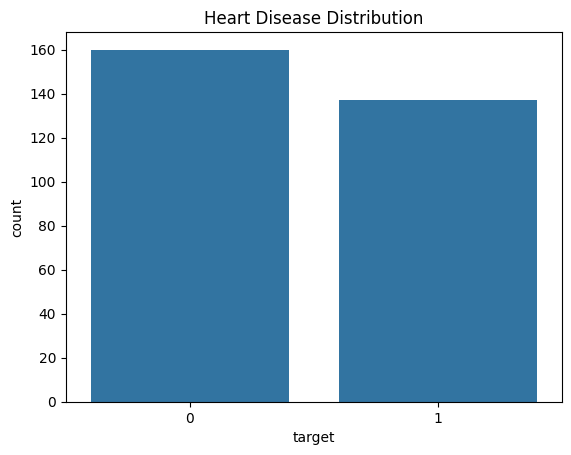

In [26]:
# Class balance
sns.countplot(data = df, x = 'target')
plt.title('Heart Disease Distribution')

### Heatmap

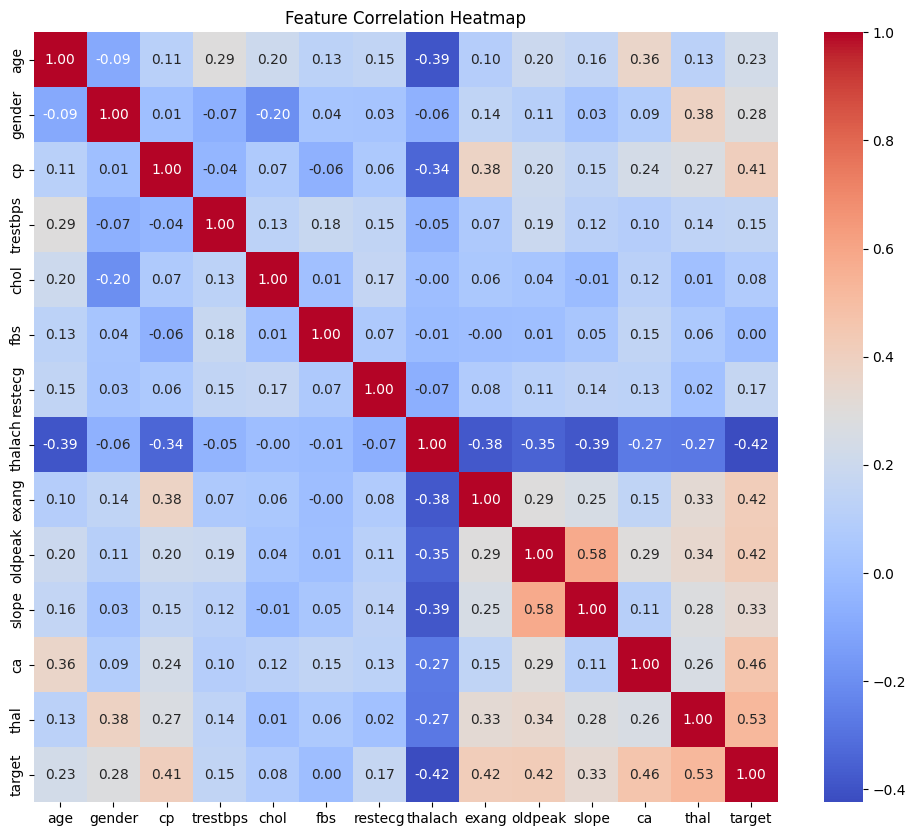

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Pairplot

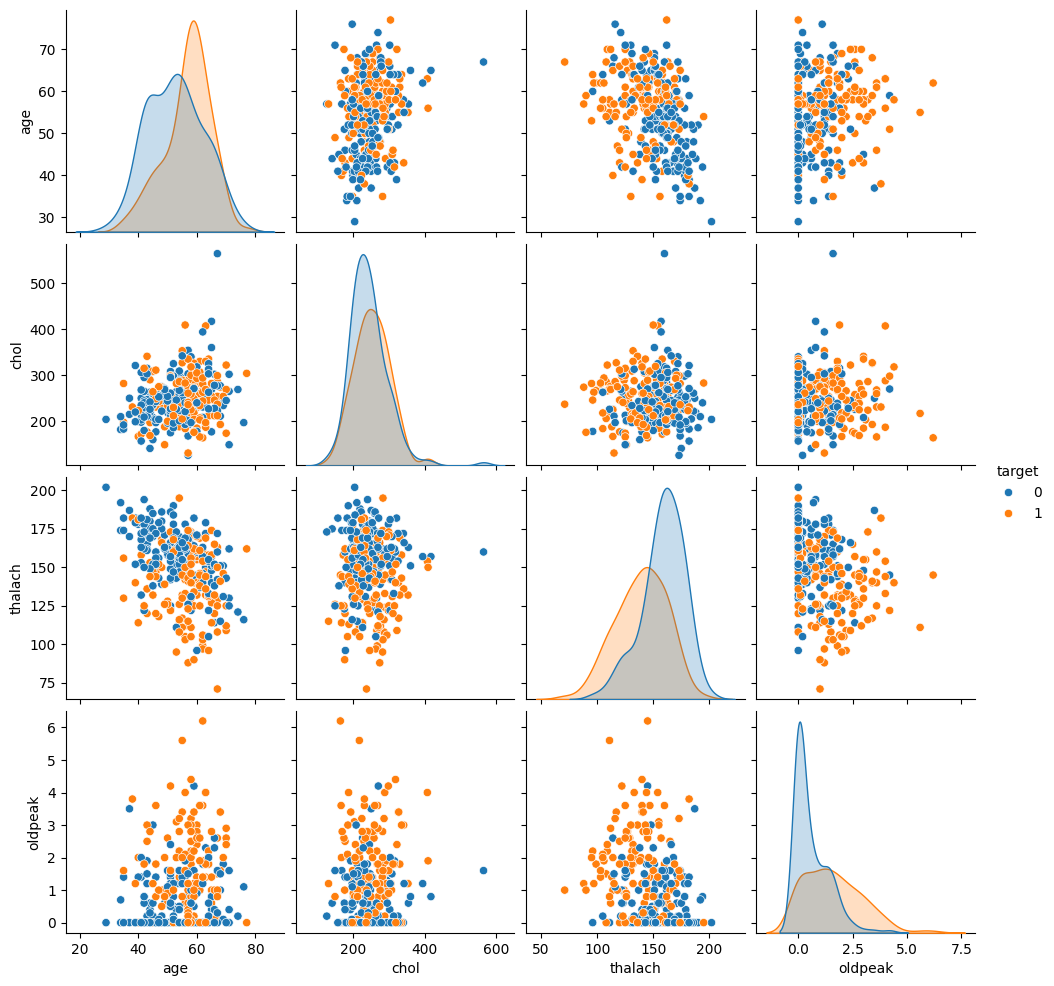

In [13]:
# Feature vs target relationship
sns.pairplot(df[["age", "chol", "thalach", "oldpeak", "target"]], hue="target")
plt.show()


## 6. Define Features and Target

In [14]:
# Separate feature and target variables
X = df.drop('target', axis=1)
y = df['target']

## 7. Splitting the Data into Training and Testing Sets

In [15]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling Traing data onnly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Creating and Training Logistic Regression Model

In [16]:
# Create Model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

#       Component                  	Meaning
# LogisticRegression():	    Builds a logistic regression model
# max_iter=1000:        	Allows the solver up to 1000 steps to find the optimal solution

LogisticRegression(max_iter=1000)

## 9. Predicting on Test Data

In [17]:
# Predicting on test data
y_pred = model.predict(X_test_scaled)

In [18]:
# Probability of Class 1
y_prob = model.predict_proba(X_test_scaled)[:, 1]

#    Code	                         Meaning
# predict_proba(X): 	Predicts probabilities for all classes
# [:, 1]:            	Selects probabilities for class 1 only
# y_prob	            Probability that each test sample is "positive"

## 10. Model Evaluation

In [19]:
# 1. Model Accuracy
print('Accuracy Score:\n', accuracy_score(y_test, y_pred))
# 2. Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy Score:
 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



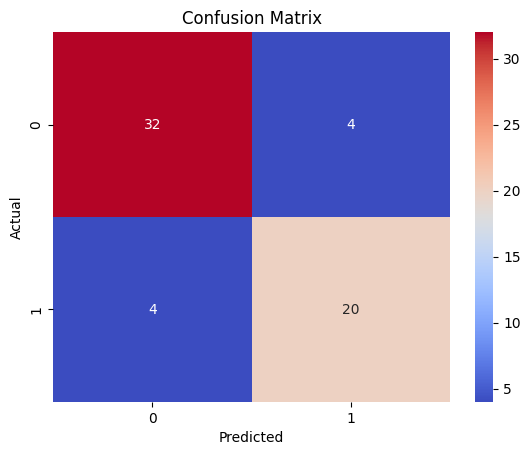

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve and AUC

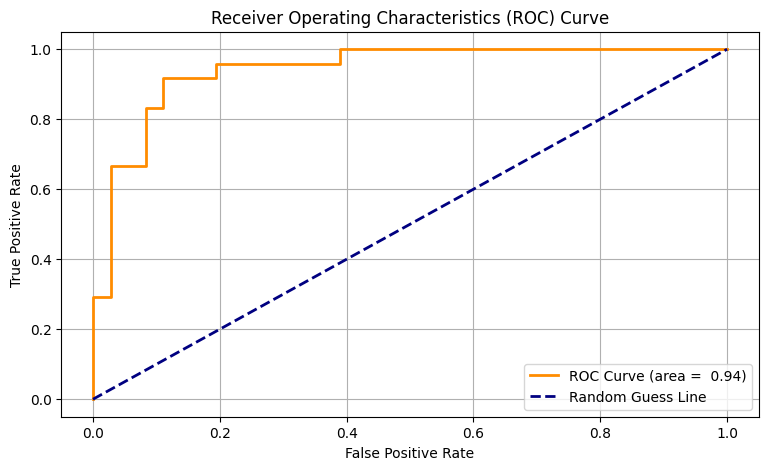

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(9,5))
plt.plot(fpr,tpr, color = 'darkorange', lw = 2, label = f"ROC Curve (area = {roc_auc: .2f})")
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc = "lower right")
plt.grid()
plt.show()

## Visualizing the Classification

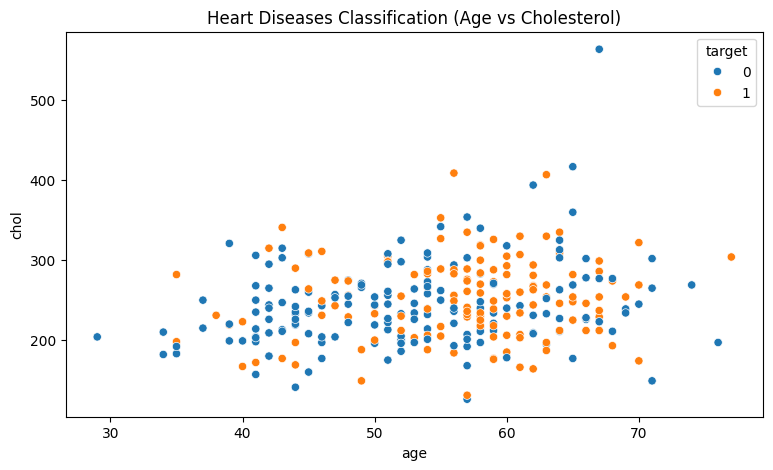

In [22]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data = df, x = 'age', y = 'chol', hue = 'target')
plt.title('Heart Diseases Classification (Age vs Cholesterol)')
plt.show()

## **Predicting a New Record**


In [23]:
new_record = pd.DataFrame([[60, 1, 3, 130, 206, 0, 0, 132, 1, 2.4, 1, 0, 3]], columns = X.columns)
prediction = model.predict(new_record)
print(f"The predicted class for new record is : {'Heart Disease' if prediction [0] == 1 else 'No Heart Disease'}")


The predicted class for new record is : Heart Disease


c:\Users\Usman Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Displaying Classification Results in a Table

In [24]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Classification Results: \n", results.head(40))


Sample Classification Results: 
      Actual  Predicted
169       0          0
214       1          0
63        0          0
155       1          1
5         0          0
77        0          0
185       0          0
159       0          1
9         1          1
140       0          0
290       1          1
78        0          0
93        0          0
102       0          0
42        0          0
225       0          0
288       0          0
33        0          0
267       1          0
149       0          0
248       1          1
45        1          1
60        1          1
46        0          0
282       1          1
240       0          0
177       1          1
237       1          1
17        0          0
283       0          0
112       0          0
222       0          0
24        1          1
82        0          0
7         0          0
75        0          0
109       1          1
84        0          0
91        1          1
73        1          1
